In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist  # To import MNIST dataset
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [3]:
np.random.seed(0)

In [4]:
# Loading 60,000 train images into train dataset and 10,000 into test dataset,
# each image is 28 by 28 pixels
# It can be seen by print(X_train.shape) and print(X_test.shape)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
print(X_test.shape)
print(X_train.shape)
print(y_train.shape[0])

(10000, 28, 28)
(60000, 28, 28)
60000


In [6]:
# Verify whether our complex dataset is imported correctly.
# assert() take in a single argument, which is usually a condition which is
# either true or false. If the condition is not met, the code will stop running
# and will show an error to the user. It helps debugging the code when necessary
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels"
assert(X_train.shape[1:] == (28,28)), "The dimensions of the image are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the image are not 28x28"

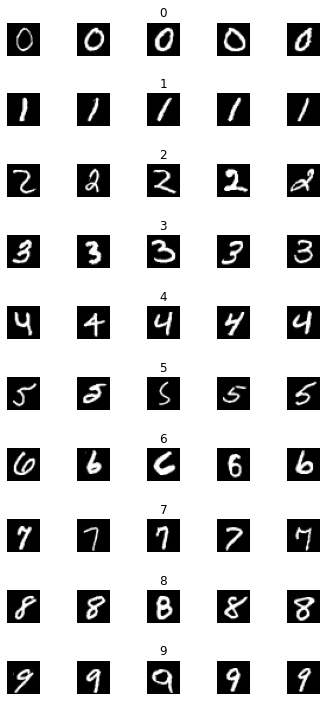

In [7]:
# An empty list that will be used to record the amount of images in each of our
# 10 categories
num_of_samples = []

# A grid arrangement to help us visualize our data, including 10 rows (0-9) and
# each row will have 5 columns of images, obtained from MNIST
cols = 5
num_classes = 10

# plt.subplots() allows multiple plot at the same figure, and returns a tuple of
# 2 values, an instance of our figure as well as the plot axes, which we will
# use to show and plot our image
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 10))
fig.tight_layout()  # Minimizes overlapping of plots and axes

# To count up how many instances of each class are in our dataset, by looping
# through every single column, and for each column iteration we will iterate
# through every row, or in this case every class --> following nested for loop
# ### Watch the video #122 for explanation of the loop
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))  # cmap=plt.get_cmap("gray") --> Grayscale colour map
        axs[j][i].axis("off")  # To turn off axis titles for each plot
        
        # Set a title for each class at the middle
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

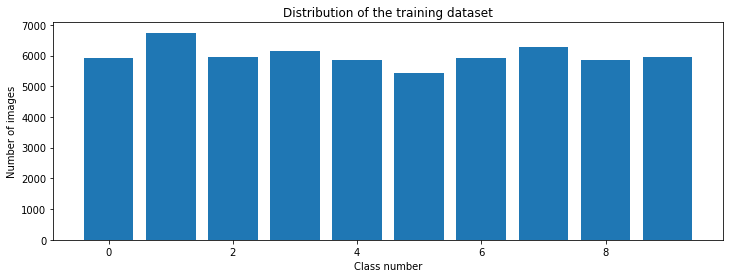

In [8]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

**Preparing our data to be used to train our neural network to recognize it:**

In [9]:
# One hot encoding our data labels
y_train = to_categorical(y_train, 10)  # 10 = total number of classes
y_test = to_categorical(y_test, 10)

In [10]:
# Normalizing our data
# Each image contains pixel intensities from 0 to 255. We devide by 255, because
# we want to normalize our data to be in a range between 0 and 1 (0->0, 255->1)
# Normalization is important as it scales down our features to a uniform range,
# and decreases variance among our data
# Due to the nature of the mathematical operations used inside the neural
# network, we need to ensure that our data has low variance. This helps the
# neural network better deal with the inputted data, and to learn more quickly
# and accurately
X_train = X_train/255
X_test = X_test/255

In [11]:
# Flatten our images:
# To conduct matrix multiplication, we must make our images, one dimensional.
# Therefore, instead of 28x28 matrix, it should be flattened to single row of
# 784 pixels
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


Now that our data is properly formatted and prepared by normalizing and flattening them, we can finally move on towards creating and training our neural network and using it to classify the MNIST dataset images.
It should be noted that this can be done best using the Convolutional Neural Network (CNN), which is the topic of the next section of this course.
For now we will classify the images with a regular deep neural network, and see what kind of results we end up with.

In [12]:
def create_model():
    model = Sequential()
    
    # Number of output nodes: 10 (0-9) --> Therefore, as we are dealing with
    # than 1 output node, we need to use softmax activation function, which
    # converts the scores which we obtain in the final layer to probabilities,
    # and the output node with the highest probability corresponds to the class
    # to which the image that we passed in to the neural network most likely
    # belongs.
    # Number of input nodes: 28*28=784 (number of pixels in each image) --> we
    # are dealing with a rather complex dataset, which will require a deep
    # neural network with the use of some hidden layers.
    # How many hidden layers? Unfortunately, there isn't a concrete answer, and
    # adding so many hidden layres can lead to overfitting, but at the same time
    # we don't want to underfit our model by not adding enough parameters.
    # We can get a better sense of that by proceeding with the code and making
    # empirical obseravations on which factors best influence generalizeability.
    # So, it all comes down to training the neural network based on different
    # values, and seeing which one gives the best accuracy in our test data.
    # For the sake of it, we start with 1 hidden layer
    # RELU activation function will be covered in more depth in the next
    # sections, but it is essentially a nonlinear activation function just like
    # sigmoid, except relu through empirical observations generally performs
    # better in most situations. Most notably once we start working with
    # convolutions.
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))  # Input layer
    model.add(Dense(10, activation='relu'))  # Hidden layer
    model.add(Dense(num_classes, activation='softmax'))  # Output layer
    model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [13]:
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


Notice how the first layer is parametrized by 7850 weight and biass values.
That's alot of parameters that the network has to update. Keep in mind that the image from the MNIST dataset has a relatively small 28 by 28 dimension of normalized values, and sicne they are grayscale images, we only have a single channel of pixel intensity values. In this case, the images that we are dealing with are computationally manageable by the feedforward neural network.
However, what if we were dealing with an RGB images, 72 by 72 pixels which corresponds to 5184 pixel values, and since we are dealing with 3 channels colure image, it will at the end results in 5184*3=15552 weights parameterizing each node in the hidden layer. This will correspond to a high computational complexity, and needs highere number of hidden layers and number of neurons in each layer, and we wouldn't have such a computational power to train the shear size of the neural network. This is why we use convolutional neural networks which makes processing more computationally manageable.

In [14]:
# Training the model
# validation_split=0.1 -->  From the theory: we need to split of training images
# into 2 subsets, the training set and the validation set. We use 10% of our
# training data to measure how well is able to generalize to it.
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=200, verbose=1, shuffle=1)

Epoch 1/10
270/270 [==============================] - 16s 5ms/step - loss: 0.9195 - accuracy: 0.6901 - val_loss: 0.3010 - val_accuracy: 0.9133
Epoch 2/10
270/270 [==============================] - 1s 3ms/step - loss: 0.3180 - accuracy: 0.9030 - val_loss: 0.2494 - val_accuracy: 0.9283
Epoch 3/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2758 - accuracy: 0.9178 - val_loss: 0.2418 - val_accuracy: 0.9325
Epoch 4/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2565 - accuracy: 0.9228 - val_loss: 0.2338 - val_accuracy: 0.9310
Epoch 5/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2432 - accuracy: 0.9267 - val_loss: 0.2128 - val_accuracy: 0.9385
Epoch 6/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2351 - accuracy: 0.9292 - val_loss: 0.2024 - val_accuracy: 0.9412
Epoch 7/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2290 - accuracy: 0.9295 - val_loss: 0.2405 - val_accuracy: 0.9297
Epoch

Text(0.5, 0, 'epoch')

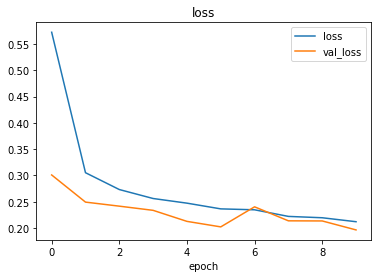

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])  # Validation loss
plt.legend(['loss', 'val_loss'])
plt.title('loss')
plt.xlabel('epoch')

Everything is as expected as the validation loss is consistently lower than the training loss, which makes sense and many reasons can be attributed to this result. The first being is that the training loss is calculated over the entire training dataset, whereas the validation loss is calculated over the entire validation set, whihc is only 10% of the size of the training data. Training set is however 9 times larger. So, naturally you would expect a smaller loss measure on the validation. But at the same time, the training set has many hardcases to learn, whereas the validation set is then applied to a model that's already been trained and thus has easier cases to predict and only fine tunes the hyperparameters of the model accordingly.

But what really important is here, is that the more epochs we run, the training and the validation loss, they start to approach each other, until at one point our training loss will become less than the validation error.
And if we try it with for example 30 epochs, we'll notice that about 15 epochs, our training error becomes lower than the validation, and that's were we begin to overfit model since what that implies is that our model keeps memorizing the training set, but then it fails to generalize itself to new data on the validation.
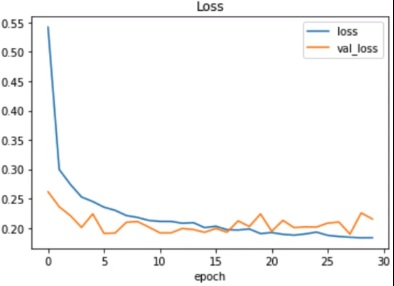

So, really the number of epochs that we should train our model on, or even the number of hidden layers is something that we have to be carefull about to not overfit our model.


Text(0.5, 0, 'epoch')

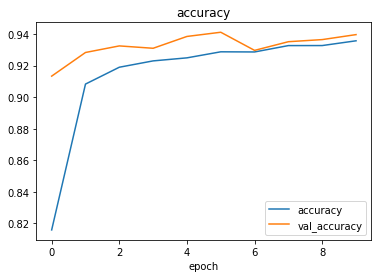

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])  # Validation loss
plt.legend(['accuracy', 'val_accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')

In [17]:
# We can also increase the number of nodes, and instead of 10 , we will use 784
# nodes in each layer. With that, the capacity will be increased, and the model
# will overfit.
def create_model_2():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, activation='relu'))  # Input layer
    model.add(Dense(num_pixels, activation='relu'))  # Hidden layer
    model.add(Dense(num_classes, activation='softmax'))  # Output layer
    model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [18]:
model_2 = create_model_2()
print(model_2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_4 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                7850      
Total params: 1,238,730
Trainable params: 1,238,730
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
history_2 = model_2.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=200, verbose=1, shuffle=1)

Epoch 1/10
270/270 [==============================] - 10s 34ms/step - loss: 0.7137 - accuracy: 0.8349 - val_loss: 0.1261 - val_accuracy: 0.9648
Epoch 2/10
270/270 [==============================] - 9s 33ms/step - loss: 0.1249 - accuracy: 0.9611 - val_loss: 0.0979 - val_accuracy: 0.9707
Epoch 3/10
270/270 [==============================] - 9s 33ms/step - loss: 0.0961 - accuracy: 0.9715 - val_loss: 0.1066 - val_accuracy: 0.9698
Epoch 4/10
270/270 [==============================] - 9s 33ms/step - loss: 0.0858 - accuracy: 0.9751 - val_loss: 0.1138 - val_accuracy: 0.9728
Epoch 5/10
270/270 [==============================] - 9s 33ms/step - loss: 0.0795 - accuracy: 0.9768 - val_loss: 0.1350 - val_accuracy: 0.9648
Epoch 6/10
270/270 [==============================] - 9s 33ms/step - loss: 0.0791 - accuracy: 0.9770 - val_loss: 0.1202 - val_accuracy: 0.9735
Epoch 7/10
270/270 [==============================] - 9s 33ms/step - loss: 0.0721 - accuracy: 0.9796 - val_loss: 0.1428 - val_accuracy: 0.970

Text(0.5, 0, 'epoch')

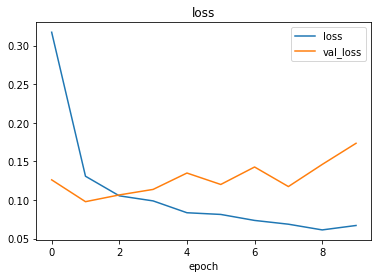

In [20]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])  # Validation loss
plt.legend(['loss', 'val_loss'])
plt.title('loss')
plt.xlabel('epoch')

Notice how the validation error immedaitely surpasses the training error. Validation error becomes again higher than the training error which means that it's doing a good job training itself on the training data, but performs pretty poorly on the validation set 

Text(0.5, 0, 'epoch')

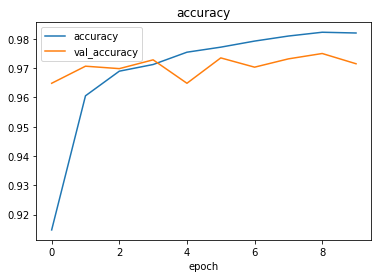

In [21]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])  # Validation loss
plt.legend(['accuracy', 'val_accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')

In [22]:
# Now we validate our model and evaluate how it will perform on the images that
# it has never seen before.
score = model.evaluate(X_test, y_test, verbose=0)

# score will return a list, and we are interested in two elements of this list,
# which are score and accuracy
print(type(score))
print('Test score: ', score[0])
print('Test accuracy: ', score[1])
# With CNN we can reach 98% or 99% of accuracy

<class 'list'>
Test score:  0.23657338321208954
Test accuracy:  0.9330000281333923


Now that we have trained a model, let's see it in action and use it to predict a calss of handwritten image. Here we try to identify the number 2.

<Response [200]>


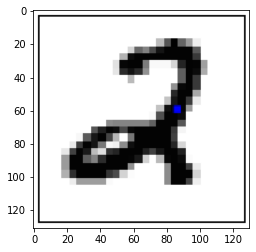

In [24]:
import requests
from PIL import Image
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)

(131, 130, 3)
(28, 28)
[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255  45]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255  45]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255  45]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 188  85
    1 100 155 238 255 255 255 255 255  45]
 [255 255 255 255 255 255 255 255 255 255 255 237 166  79 100  57  16   3
    3   3   3  81 255 255 255 255 255  46]
 [255 255 255 255 255 255 255 255 255 255 228  21   4   3 113 227 227 227
  193  33   3   9 168 255 255 255 255  45]
 [255 255 255 255 255 255 255 255 255 255 227  27  12  26 136 253 253 253
  237  70   3   8 167 255 255 255 255  45]
 [255 255 255 255 255 255 255 255 255 255

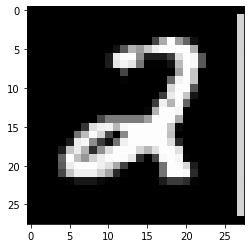

In [33]:
import cv2  # opencv library

# We need to ensure that the image corresponds to what the nerual network was
# trained to learn. --> We should make it into 28x28 grayscale image.
# 1st we need to access this png image as a numpy array so that we can modify it
img_array = np.asarray(img)
print(img_array.shape)  # As it can be seen it is 131x130x3 with a depth of 3

# Using opencv library (cv2) we will resize it to 28x28 because our network was
# trained on 28x28 images and would have trouble recognizing of images from the
# other size
resized = cv2.resize(img_array, (28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)  # Converting image from one colorspace to another
print(gray_scale.shape)

plt.imshow(gray_scale, cmap=plt.get_cmap("gray"))

# There is still one more problem, as the neural network was trained on images
# with a black background.,It can be seen from the following print statement,
# and as it can be seen, the background has the value of 255 instead of 0
print(gray_scale)

# Every 0 pixel value will be converted to 255 and vice versa. Ultimately it's
# substracting each value from 255
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap("gray"))
print("Pixel intensities inverted:")
print(image)

In [34]:
# We will normalize and flatten the image
image = image/255
image = image.reshape(1, 784)
print(image)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.82352941 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.82352941
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.      

In [36]:
prediction = model.predict_classes(image)
print("Predicted digit: ", str(prediction))

Predicted digit:  [2]


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
